# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [48]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [50]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [51]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [52]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [53]:
# Create an empty list to store row data
mars = []
rows = table.find_all('tr')

# Extract headers from the first row
header_row = rows[0]
headers = [th.text.strip() for th in header_row.find_all('th')]

# Loop through the remaining rows
for row in rows[1:]:
    # Find all data cells in the current row
    data_cells = row.find_all('td')

     # Create a dictionary for the current row
    row_data = {}
    for header, cell in zip(headers, data_cells):
            row_data[header] = cell.text.strip()
        
     # Append the row data dictionary to the mars list
    mars.append(row_data)


In [54]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars)

In [55]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [56]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [57]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [58]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [59]:
# 1. How many months are there on Mars?
number_of_months = len(df['month'].unique())
print(number_of_months)

12


In [60]:
# 2. How many sols (Martian days) worth of data are there?
sol_days = len(df['sol'])
sol_days

1867

In [61]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


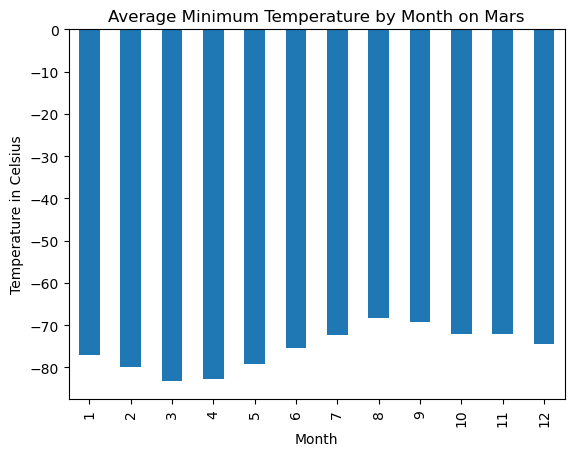

In [62]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar')

plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month on Mars')

plt.show()

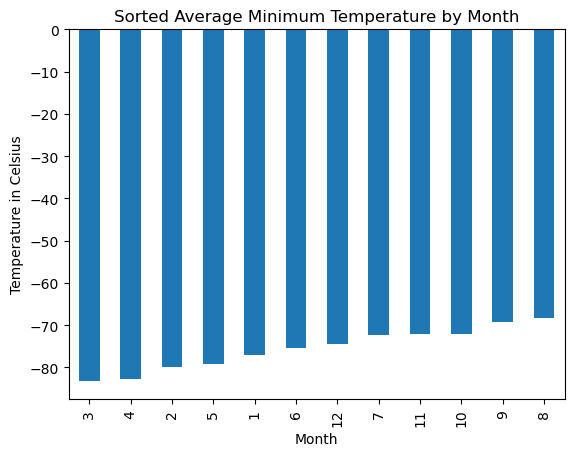

In [63]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temperatures = avg_min_temp_by_month.sort_values()

# Plot the sorted temperatures
sorted_temperatures.plot(kind='bar')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Sorted Average Minimum Temperature by Month')

# Show the plot
plt.show()

In [64]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


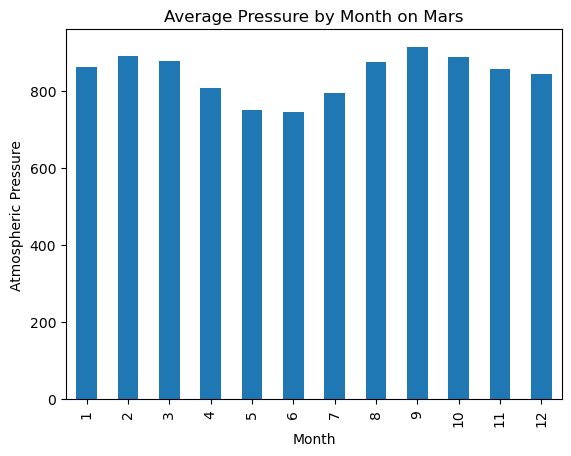

In [65]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar')

#Adding the labels and title
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month on Mars')

plt.show()

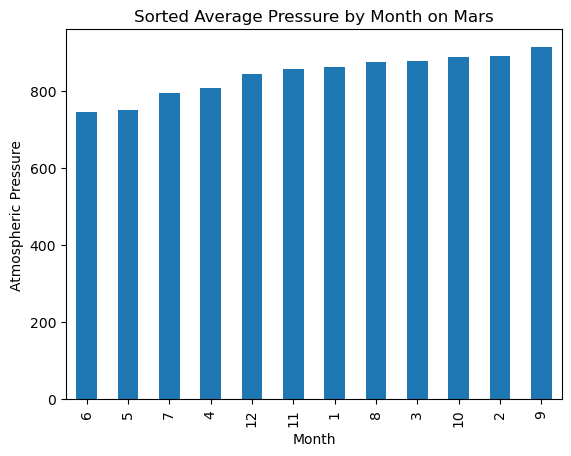

In [66]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressures = avg_pressure_by_month.sort_values()

# Plot the sorted temperatures
sorted_pressures.plot(kind='bar')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Sorted Average Pressure by Month on Mars')

plt.show()

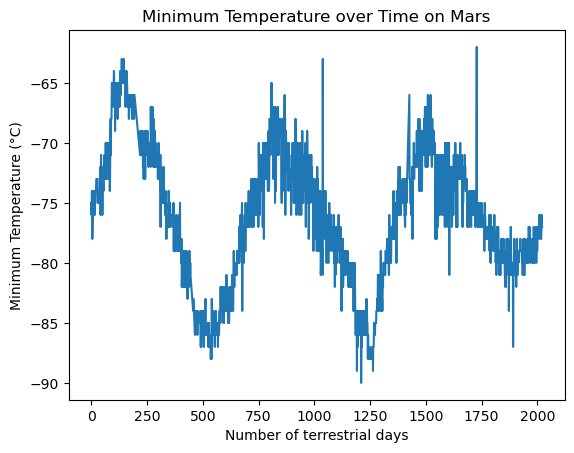

In [67]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
#Convert Years to Days
df['Num_days'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days


plt.figure

# Plotting the daily minimum temperature
plt.plot(df['Num_days'], df['min_temp'])

# Adding labels and title
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature over Time on Mars')

plt.xticks
plt.show()

#### Minimum Temperature
From the data extracted from the original website, using the .groupby method of 'month' and 'min_temp' and averaging out the result, month 3 comes in with the average lowest temperature of -83.307292 (C). The second graph, "Sorted Average Minimum Temperature by Month, represents this with month 3 being the first listed.  On the opposite spectrum, the hottest average month is month 8 at -68.382979. The graph again represents this with month 8 being listed last. 

#### Atmospheric Pressure
From the data extracted from the original website, using the .groupby method of 'month' and 'pressure' and averaging the result, the month with the lowest atmospheric pressure is month 6 with 745.054422. The month with the most pressure is month 9 with 913.305970. The fourth figure labeled "Sorted Average Pressure by Month on Mars" represents these data points with month 6 being listed first with the lowest pressure and month 9 listed last with highest.

#### Year Length
Looking at the fifth figure, 'Minimum Temperature over Time on Mars', you can see a pattern or a cycle that repeats itself 3 times. Where that cycle starts to repeat itself from day 0 is at about the 680 mark on the graph. The known orbital period on Mars is about 687  Earth days so from the visual you could conclude that the complete cycle of temperature changes represents a Martian year. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [68]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [69]:
browser.quit()